**Задание**

**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

Повторите п. 4, п. 5.

Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

# Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

In [2]:
SEED = 42

# Load data

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


 Пропуски отсутствуют

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Проверим соотношение классов

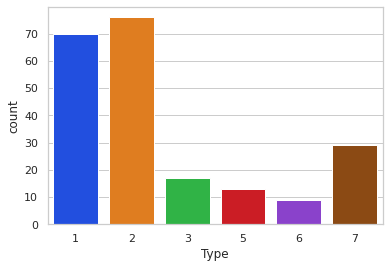

In [6]:
sns.set(style = 'whitegrid')
sns.countplot(x="Type", data=df, palette='bright')

Классы не сбалансированы, отсутствует один класс "4"

# Modeling 1

In [7]:
X = df.drop('Type', axis=1)
y = df['Type']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [9]:
clf = RandomForestClassifier(random_state=SEED).fit(X_train, y_train)

In [10]:
accuracy_score(y_test, clf.predict(X_test))

0.8372093023255814

# Removing Data Outliers

Посмотрим признаки

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


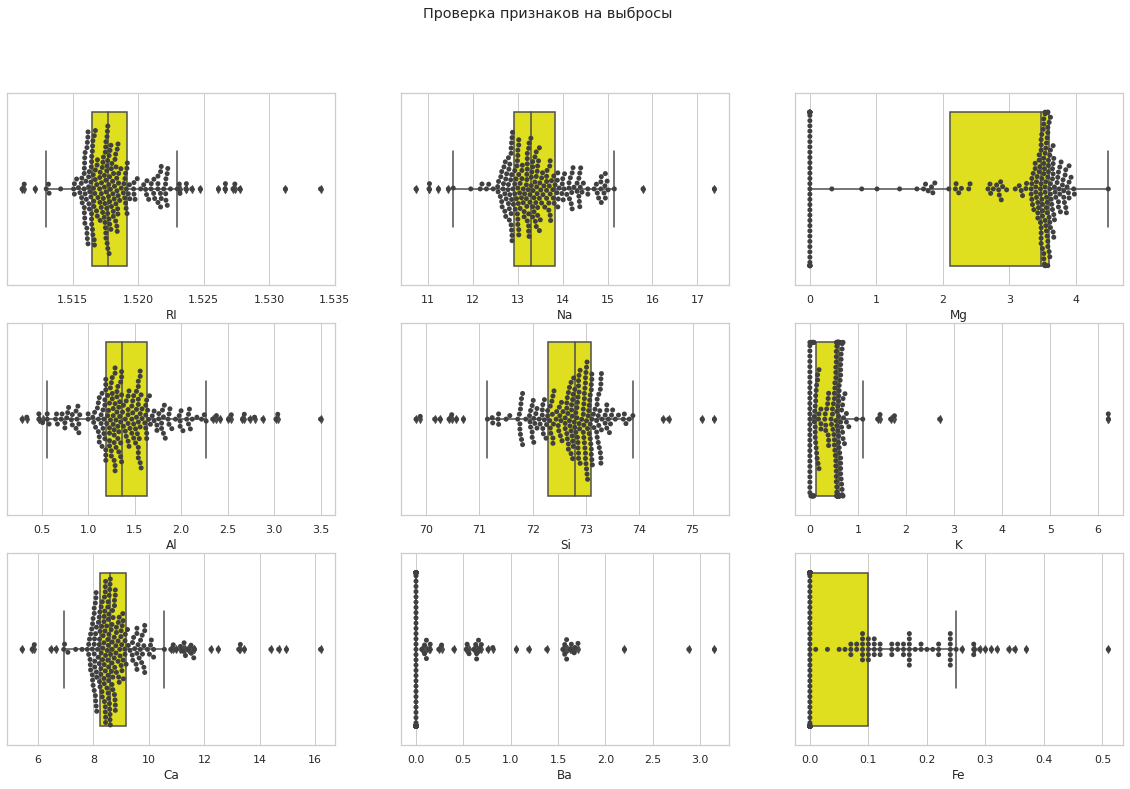

In [11]:
rows =(len(df.columns)-1)//3
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Проверка признаков на выбросы')
feature = 0
for ax_y in ax:  
    for ax_x in ax_y:
        sns.boxplot(ax=ax_x, x=df.iloc[:, feature], color="yellow")
        sns.swarmplot(ax=ax_x, x=df.iloc[:, feature], color=".25")
        feature += 1
plt.show()

На признаки с нормальным распределением похожи - RI, Na, Al, Si, Ca

Удалим выбросы в признаках с нормальным распределением, используя статистические методы. Найдем выбросы через межквартльный размах.

PS: через межквартильный размах корректно искать выбросы в нормально распределенных данных

In [12]:
feature_gauss = ['RI', 'Na', 'Al', 'Si', 'Ca']

df_outliers = pd.DataFrame()
for i in feature_gauss:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[~df[i].between(lower_bound, upper_bound, inclusive='both')]
    df_outliers = pd.concat([df_outliers, outliers])

Удалим из набора данных найденные выбросы

In [13]:
df_remove_outliers = pd.concat([df, df_outliers]).drop_duplicates(keep=False)
df_remove_outliers.shape

(165, 10)

Посмотрим на признаки после удаления выбросов

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


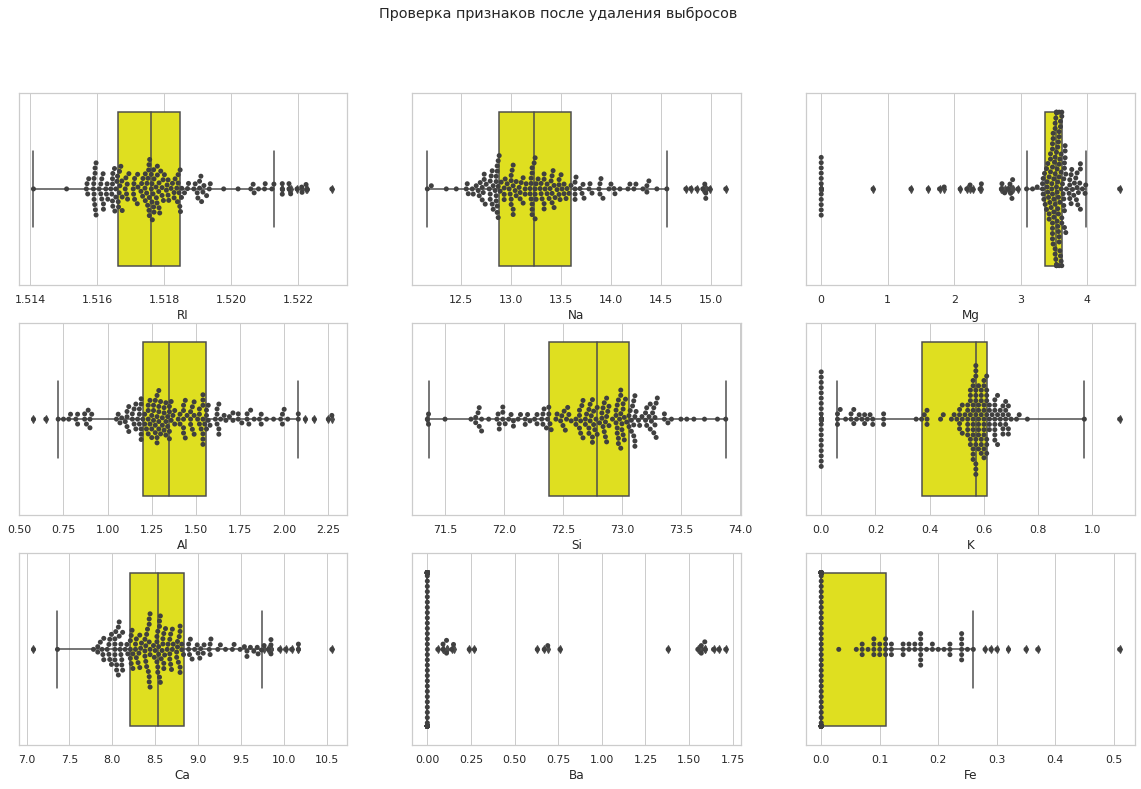

In [14]:
rows =(len(df_remove_outliers.columns)-1)//3
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Проверка признаков после удаления выбросов')
feature = 0
for ax_y in ax:  
    for ax_x in ax_y:
        sns.boxplot(ax=ax_x, x=df_remove_outliers.iloc[:, feature], color="yellow")
        sns.swarmplot(ax=ax_x, x=df_remove_outliers.iloc[:, feature], color=".25")
        feature += 1
plt.show()

Применим к полученной выборке методы машинного обучения для поиска и удаления выбросов

In [15]:
X = df_remove_outliers.drop('Type', axis=1)
y = df_remove_outliers['Type']

In [16]:
outliers_if = IsolationForest(random_state=SEED).fit_predict(X, y)

In [17]:
df_remove_outliers = df_remove_outliers.assign(outliers_if=outliers_if)
df_remove_outliers = df_remove_outliers[df_remove_outliers['outliers_if']==1]
df_remove_outliers.shape

(137, 11)

Посмотрим на признаки после удаления выбросов

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


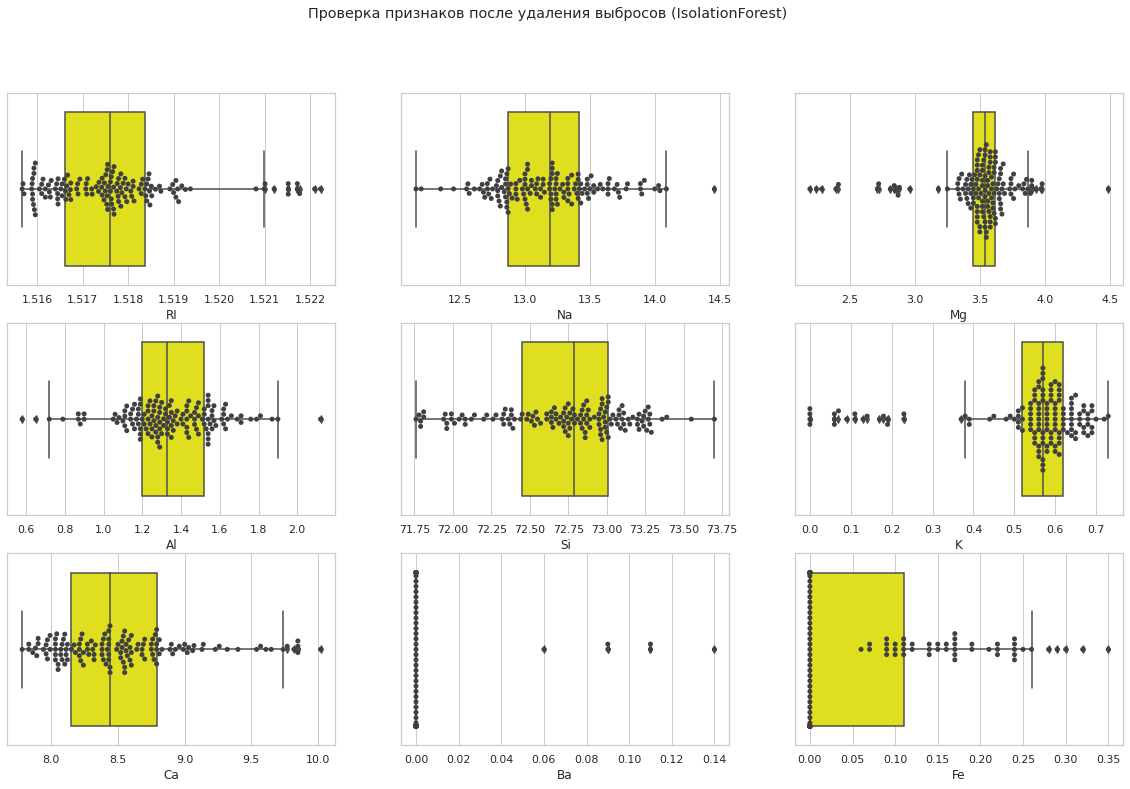

In [18]:
rows =(len(df_remove_outliers.columns)-1)//3
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Проверка признаков после удаления выбросов (IsolationForest)')
feature = 0
for ax_y in ax:  
    for ax_x in ax_y:
        sns.boxplot(ax=ax_x, x=df_remove_outliers.iloc[:, feature], color="yellow")
        sns.swarmplot(ax=ax_x, x=df_remove_outliers.iloc[:, feature], color=".25")
        feature += 1
plt.show()

Посчитаем процент удаленных записей от общего числа записей для каждого класса

In [19]:
df_number_type = pd.DataFrame(df.value_counts('Type'), columns=['Number of types'])
df_number_type_remove_outliers = pd.DataFrame(df_remove_outliers.value_counts('Type'), 
                                              columns=['Number of types (remove  outliers)'])

In [20]:
df_number_type = pd.concat([df_number_type, df_number_type_remove_outliers], axis=1)
df_number_type = df_number_type.fillna(0).sort_values('Number of types', ascending=False)
df_number_type.loc[:, 'Percent_remove_obj_class'] = round((1 - df_number_type.loc[:, 'Number of types (remove  outliers)'] 
                                                           / df_number_type.loc[:, 'Number of types']
                                                           ) * 100, 2)
df_number_type.style.bar('Number of types', align='mid')

,Number of types,Number of types (remove outliers),Percent_remove_obj_class
Type,,,
2,76,59.000000,22.370000
1,70,60.000000,14.290000
7,29,0.000000,100.000000
3,17,14.000000,17.650000
5,13,0.000000,100.000000
6,9,4.000000,55.560000


# Modeling 2

In [21]:
X = df_remove_outliers.drop('Type', axis=1)
y = df_remove_outliers['Type']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [23]:
clf = RandomForestClassifier(random_state=SEED).fit(X_train, y_train)

In [24]:
accuracy_score(y_test, clf.predict(X_test))

0.7857142857142857

# Resume

а) Были удалены выбросы методом машинного обучения и статистическим методом.

б) В нашем случае точность метрики упала. И ко всему прочему в итоговом датасете 2 классов не стало, они были отброшены как выбросы.

в) На выбросы проверять данные необходимо, но делать это следует осторожно и обдуманно. В первую очередь, руководствуясь правилом, "не навреди".

# Literature

1. https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27